# **PHASE 1: PROJECT SETUP**

**Step 1.1 Load All Three CSVs**

In [2]:
from google.colab import files
uploaded = files.upload()


Saving TCS_stock_action.csv to TCS_stock_action.csv
Saving TCS_stock_history.csv to TCS_stock_history.csv
Saving TCS_stock_info.csv to TCS_stock_info.csv


**Step 1.2 Clean & Prepare df_history (TCS_stock_history.csv :  Primary Dataset)**

In [3]:
import pandas as pd

# Use the actual uploaded filenames (check them from the files dictionary)
df_history = pd.read_csv('TCS_stock_history.csv')
df_info = pd.read_csv('TCS_stock_info.csv')
df_action = pd.read_csv('TCS_stock_action.csv')


In [4]:
df_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [5]:
# Convert Date to datetime
df_history['Date'] = pd.to_datetime(df_history['Date'])

# Sort by date
df_history = df_history.sort_values(by='Date')
df_history.reset_index(drop=True, inplace=True)

# Check data types and nulls
print(df_history.info())
print(df_history.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB
None
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


**Step 1.3: Initial Visualization**

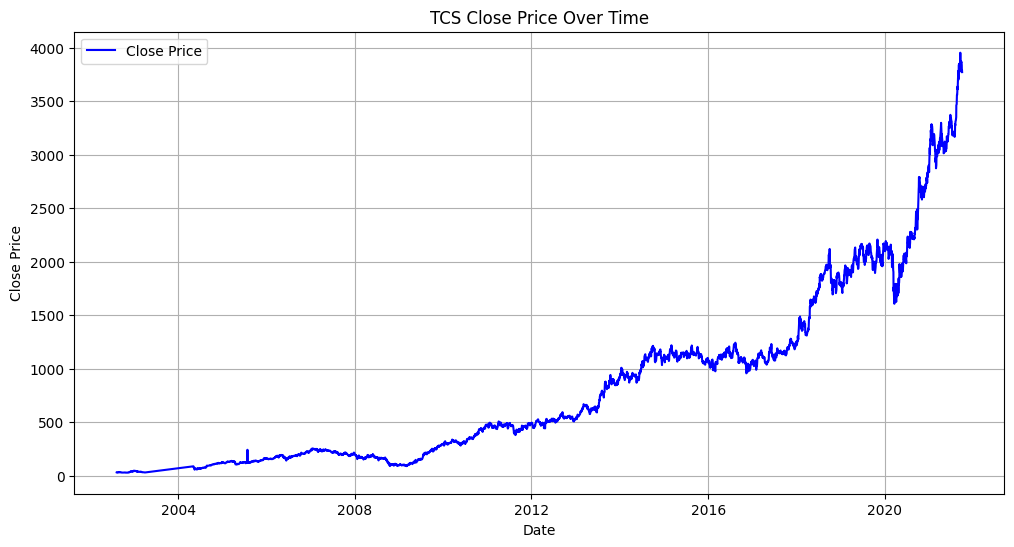

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_history['Date'], df_history['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Close Price Over Time')
plt.grid(True)
plt.legend()
plt.show()


# **Phase 2: Data Preprocessing**

Objective: Clean and prepare the data so it's ready for EDA and modeling.



**Step 2.1: Check for Nulls**

In [8]:
df_history.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [9]:
# Fill missing values using forward fill
df_history.fillna(method='ffill', inplace=True)


/tmp/ipython-input-9-2135942139.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_history.fillna(method='ffill', inplace=True)


**Step 2.2: Ensure Correct Data Types**

In [10]:
df_history.dtypes


,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Dividends,float64
Stock Splits,float64


In [11]:
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
for col in cols_to_convert:
    df_history[col] = pd.to_numeric(df_history[col], errors='coerce')

df_history.fillna(method='ffill', inplace=True)  # Just in case new NaNs appear


/tmp/ipython-input-11-54204086.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_history.fillna(method='ffill', inplace=True)  # Just in case new NaNs appear


**Step 2.3: Check for Outliers**

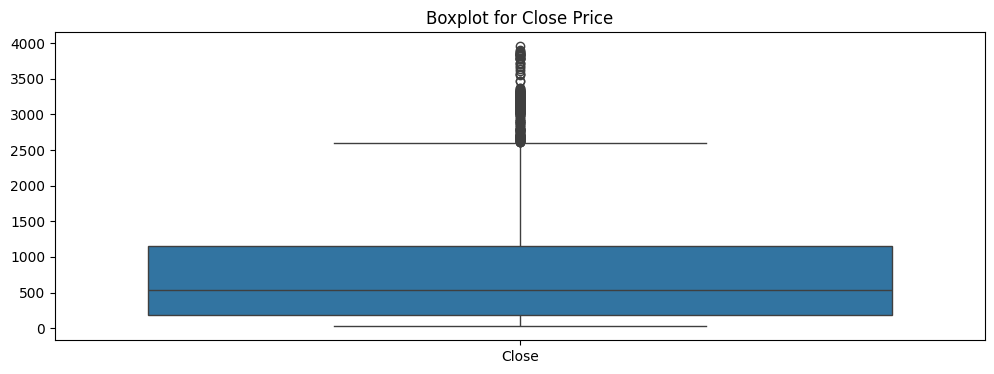

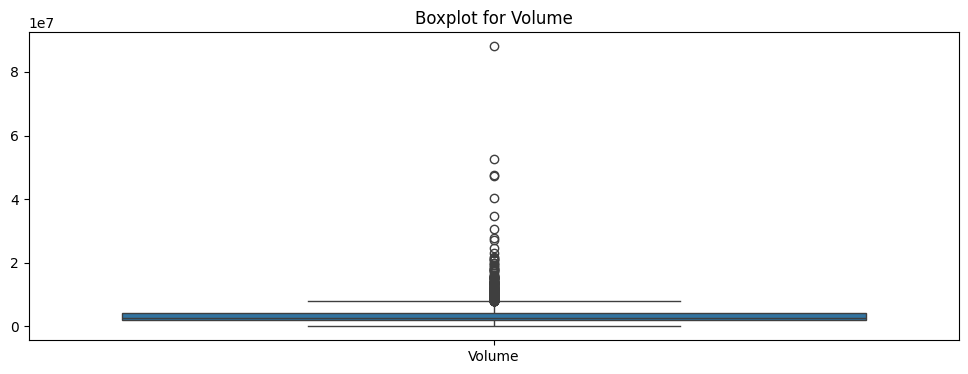

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_history[['Close']])
plt.title('Boxplot for Close Price')
plt.show()

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_history[['Volume']])
plt.title('Boxplot for Volume')
plt.show()


**Step 2.4: Create Useful Columns**

In [13]:
df_history['Year'] = df_history['Date'].dt.year
df_history['Month'] = df_history['Date'].dt.month
df_history['Day'] = df_history['Date'].dt.day
df_history['DayOfWeek'] = df_history['Date'].dt.dayofweek


**Step 2.5: Add Daily Change %**

In [15]:
# Calculate daily percentage change
df_history['Daily_Change_Pct'] = df_history['Close'].pct_change() * 100

# Fill NaN created from first row
df_history['Daily_Change_Pct'] = df_history['Daily_Change_Pct'].fillna(0)


# **Phase 3: Exploratory Data Analysis (EDA)**

Understand historical stock behavior of TCS using visualizations and stats:
*   Trends
*   Volume Analysis
*   Price Volatility
*   Correlation
*   Moving Averages









**Step 3.1: Line Plot of Close Price Over Time**

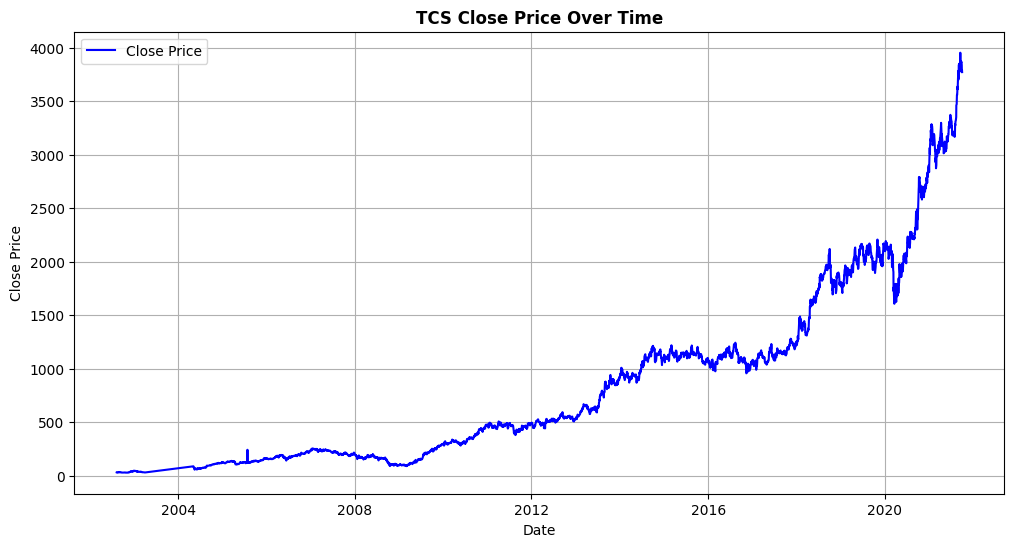

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_history['Date'], df_history['Close'], label='Close Price', color='blue')
plt.title('TCS Close Price Over Time', weight='bold')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


**Step 3.2: Trading Volume Over Time**

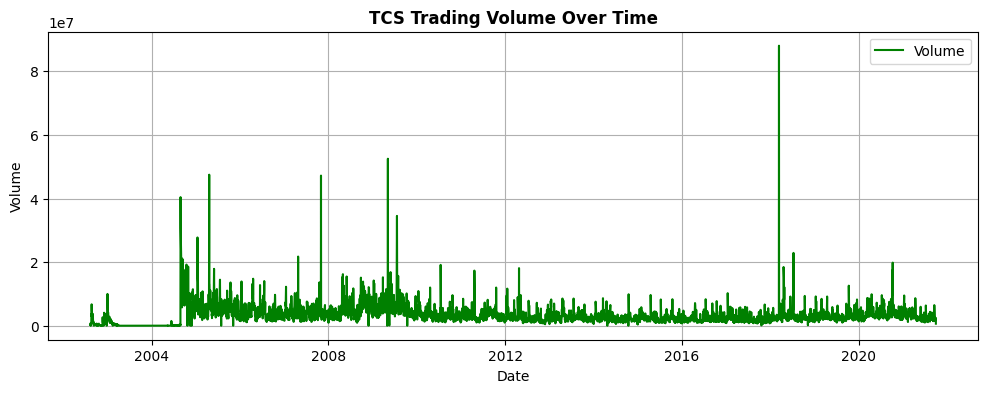

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(df_history['Date'], df_history['Volume'], label='Volume', color='green')
plt.title('TCS Trading Volume Over Time', weight='bold')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


**Step 3.3: Daily Percentage Change Distribution**

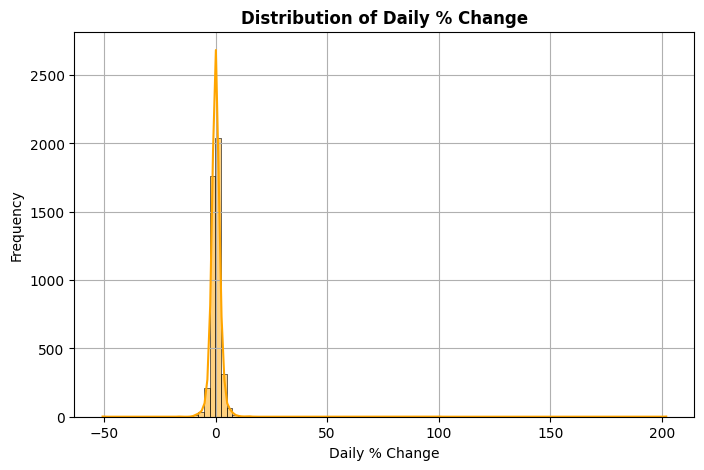

In [18]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_history['Daily_Change_Pct'], bins=100, kde=True, color='orange')
plt.title("Distribution of Daily % Change", weight='bold')
plt.xlabel("Daily % Change")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


**Step 3.4: Correlation Heatmap (Numerical Features)**

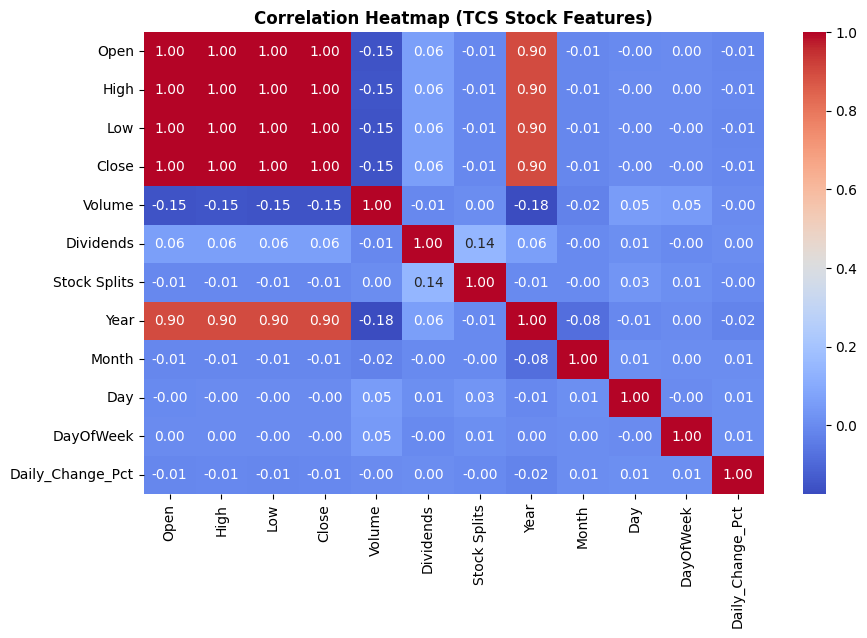

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_history.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (TCS Stock Features)", weight='bold')
plt.show()


**Step 3.5: Close Price with Moving Averages**

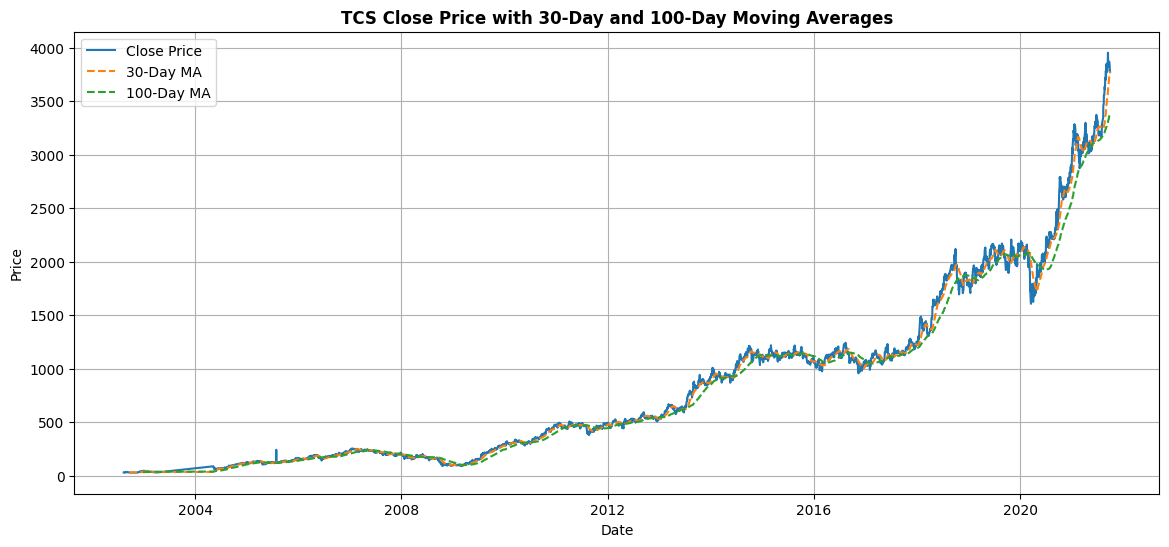

In [20]:
df_history['MA30'] = df_history['Close'].rolling(window=30).mean()
df_history['MA100'] = df_history['Close'].rolling(window=100).mean()

plt.figure(figsize=(14, 6))
plt.plot(df_history['Date'], df_history['Close'], label='Close Price')
plt.plot(df_history['Date'], df_history['MA30'], label='30-Day MA', linestyle='--')
plt.plot(df_history['Date'], df_history['MA100'], label='100-Day MA', linestyle='--')
plt.title("TCS Close Price with 30-Day and 100-Day Moving Averages", weight='bold')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


# **Phase 4: Feature Engineering**

Objective: Extract new features from existing columns (especially Date and Close) to improve the model’s ability to detect patterns and trends.

**Step 4.1: Reconfirm Date Column and Dataset**

In [21]:
df_history['Date'] = pd.to_datetime(df_history['Date'])
df_history = df_history.sort_values(by='Date').reset_index(drop=True)


**Step 4.2: Time-Based Features**

In [22]:
df_history['Year'] = df_history['Date'].dt.year
df_history['Month'] = df_history['Date'].dt.month
df_history['Day'] = df_history['Date'].dt.day
df_history['DayOfWeek'] = df_history['Date'].dt.dayofweek  # Monday=0, Sunday=6


**Step 4.3: Lag Features (Previous Day’s Values)**

In [23]:
# Previous day's closing price
df_history['Prev_Close'] = df_history['Close'].shift(1)

# Previous day's high and low (optional)
df_history['Prev_High'] = df_history['High'].shift(1)
df_history['Prev_Low'] = df_history['Low'].shift(1)


**Step 4.4: Rolling Statistics (Moving Averages & Volatility)**

In [24]:
# Rolling means (trend)
df_history['MA7'] = df_history['Close'].rolling(window=7).mean()
df_history['MA21'] = df_history['Close'].rolling(window=21).mean()

# Rolling std deviation (volatility)
df_history['Volatility_7'] = df_history['Close'].rolling(window=7).std()


**Step 4.5: Drop NaNs from Rolling/Lag Features**

In [25]:
df_history.dropna(inplace=True)


# **PHASE 5: MODEL BUILDING (LINEAR REGRESSION)**

Objective: Build a predictive model using Linear Regression to forecast TCS's closing stock price.



**Step 5.1: Select Features & Target Variable**

In [26]:
# Features (independent variables)
features = ['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'DayOfWeek', 'MA7', 'MA21', 'Volatility_7']

# Target (dependent variable)
target = 'Close'

# X = inputs, y = output
X = df_history[features]
y = df_history[target]


**Step 5.2: Train-Test Split**

In [27]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 5.3: Train Linear Regression Model**

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Step 5.4: Make Predictions**

In [29]:
y_pred = model.predict(X_test)


**Step 5.5: Evaluate the Model**

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 4.058993623288566
Mean Squared Error (MSE): 48.40126319919669
R² Score: 0.9999318503007047


**Step 5.6: Plot Predicted vs. Actual Prices**

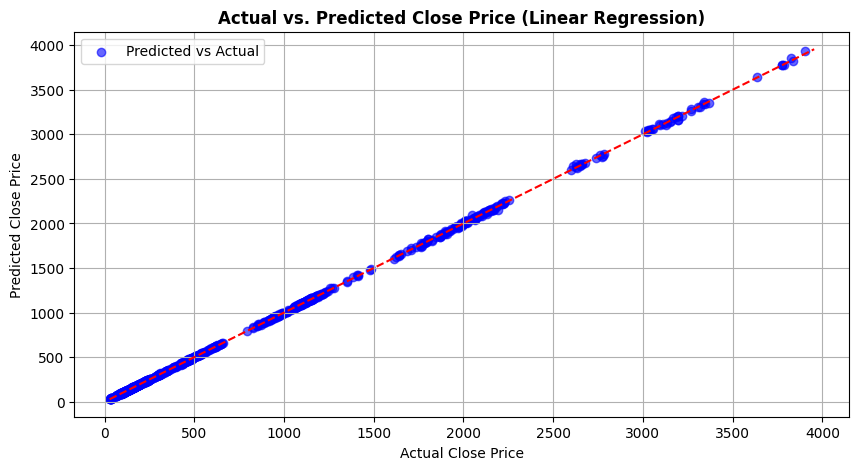

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price (Linear Regression)', weight='bold')
plt.legend()
plt.grid(True)
plt.show()


# **Phase 6: LSTM Model – Time Series Forecasting**

Objective: Use a Long Short-Term Memory (LSTM) neural network to model and predict the Close price based on past values — capturing temporal patterns better than linear models.

**Step 6.1: Install TensorFlow**

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np


**Step 6.2: Prepare the Data for LSTM**

In [33]:
# Use only the 'Close' column for time-series modeling
close_data = df_history['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_data)


**Step 6.3: Create Sequences (Windowed Data)**

In [34]:
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_close)):
    X.append(scaled_close[i - sequence_length:i, 0])
    y.append(scaled_close[i, 0])

X, y = np.array(X), np.array(y)

# Reshape to 3D for LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


**Step 6.4: Build the LSTM Model**

In [35]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Step 6.5: Train the Model**

In [36]:
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0201
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 1.6399e-04
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 1.4748e-04
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 1.5496e-04
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 1.5705e-04
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 1.4301e-04
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 1.2816e-04
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 1.2399e-04
Epoch 9/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 1.3347e-04
Epoch 10/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 1.2618e-04
Epoch 11/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 1.3350e-04
Epoch 12/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 1.0918e-04
Epoch 13/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 8.0820e-05
Epoch 14/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step -

**Step 6.6: Predict and Visualize**

In [37]:
# Predict on the last X (same data for simplicity)
predicted_prices = model.predict(X)

# Inverse scale to get actual prices
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))


135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


**Step 6.7: Plot Actual vs Predicted**

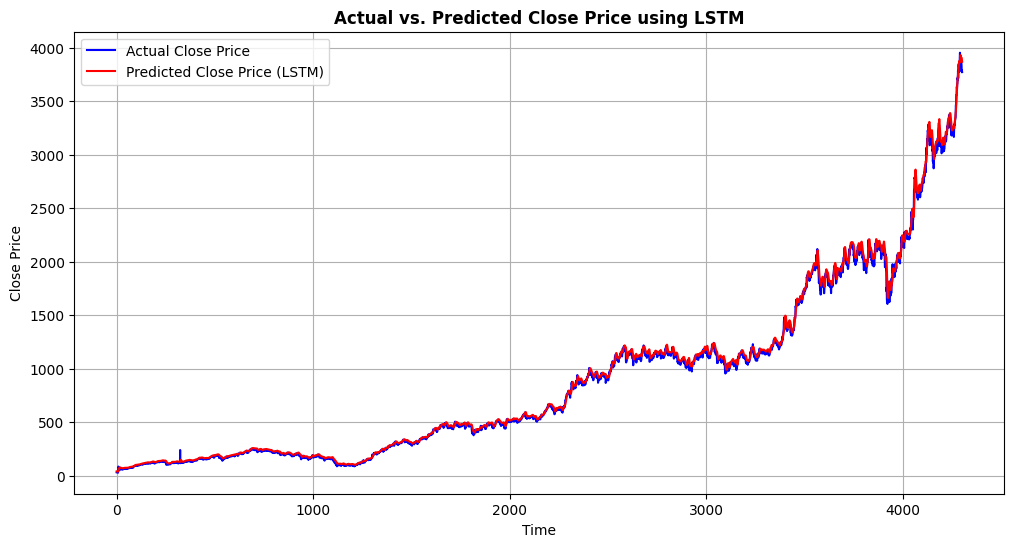

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual Close Price', color='blue')
plt.plot(predicted_prices, label='Predicted Close Price (LSTM)', color='red')
plt.title('Actual vs. Predicted Close Price using LSTM', weight='bold')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


**Step 6.8: Evaluate Model Performance**

In [39]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actual_prices, predicted_prices)
print("LSTM Mean Absolute Error (MAE):", round(mae, 2))


LSTM Mean Absolute Error (MAE): 22.51


# **Phase 7: Save Models & Export Excel Dashboard Data**

**Step 7.1: Save the Linear Regression Model**

In [40]:
import pickle

# Save Linear Regression model
with open('tcs_linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Download the model file
from google.colab import files
files.download('tcs_linear_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 7.2: Save the LSTM Model**

In [41]:
# Save the LSTM model
model.save('tcs_lstm_model.h5')

# Download the model file
files.download('tcs_lstm_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 7.3: Save LSTM Predictions**

In [42]:
import pandas as pd

# Create DataFrame with predictions and actual values
pred_df = pd.DataFrame({
    'Date': df_history['Date'].iloc[-len(predicted_prices):].values,
    'Actual_Close': actual_prices.flatten(),
    'Predicted_Close_LSTM': predicted_prices.flatten()
})

# Save to CSV
pred_df.to_csv('tcs_lstm_predictions_with_dates.csv', index=False)

# Download the CSV
files.download('tcs_lstm_predictions_with_dates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 7.4: Save Final Cleaned Data for Excel Dashboard**

In [43]:
# Save the enriched dataframe (with all features and clean data)
df_history.to_excel('TCS_Stock_Data_Cleaned.xlsx', index=False)

# Download the Excel file
files.download('TCS_Stock_Data_Cleaned.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>